# **Exploratory Data Analysis on Boston Housing Dataset**


- Samia: Columns: CRIM, ZN, INDUS, CHAS  
- Suraiya: Columns: NOX, RM, AGE, DIS  
- Mehedi: Columns: RAD, TAX, PTRATIO, B  
- Akhlak: Columns: LSTAT, MEDV, Report Integration

---


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Boston_Housing_assignment.csv to Boston_Housing_assignment.csv


In [ ]:
# Install if needed
# !pip install missingno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

# Load Dataset
df = pd.read_csv('Boston_Housing_assignment.csv')  # Use correct path in Colab

# 🔁 Change these columns as per your assignment
my_columns = ['crim', 'zn', 'indus', 'chas']  # Each member puts their 3+ assigned columns
target_column = 'medv'  # Make sure this column is present

# Subset for analysis
df_subset = df[my_columns].copy()


## **2. Data Cleaning**

### 2.1 Missing Values (All Members)
- Identify missing values.
- Show % missing for each column.
- Apply imputation: Mean, Median, or Mode.
- **Visualizations**: Missing data barplot/heatmap.

---




Missing Data %:
crim     0.000000
zn       0.000000
indus    0.395257
chas     0.000000
dtype: float64


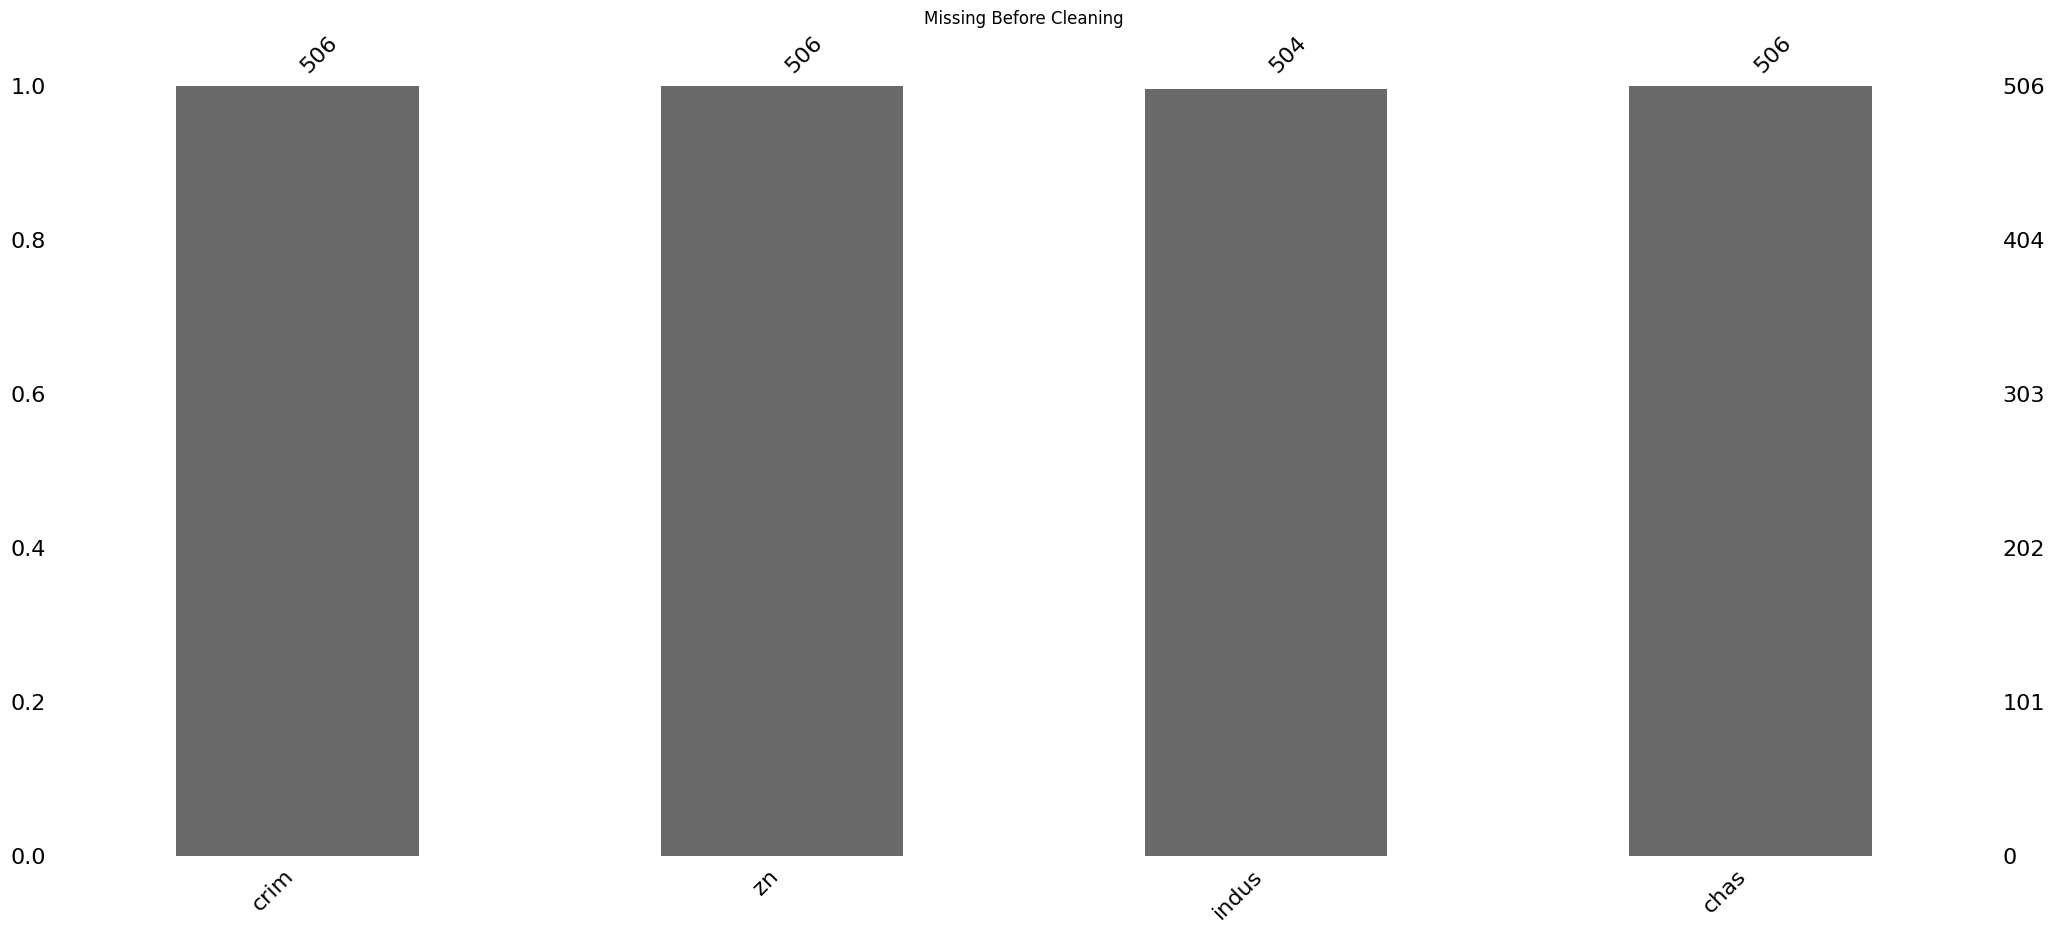

<ipython-input-3-b2c5c1706f88>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset[col].fillna(df_subset[col].median() if df_subset[col].skew() > 1 else df_subset[col].mean(), inplace=True)


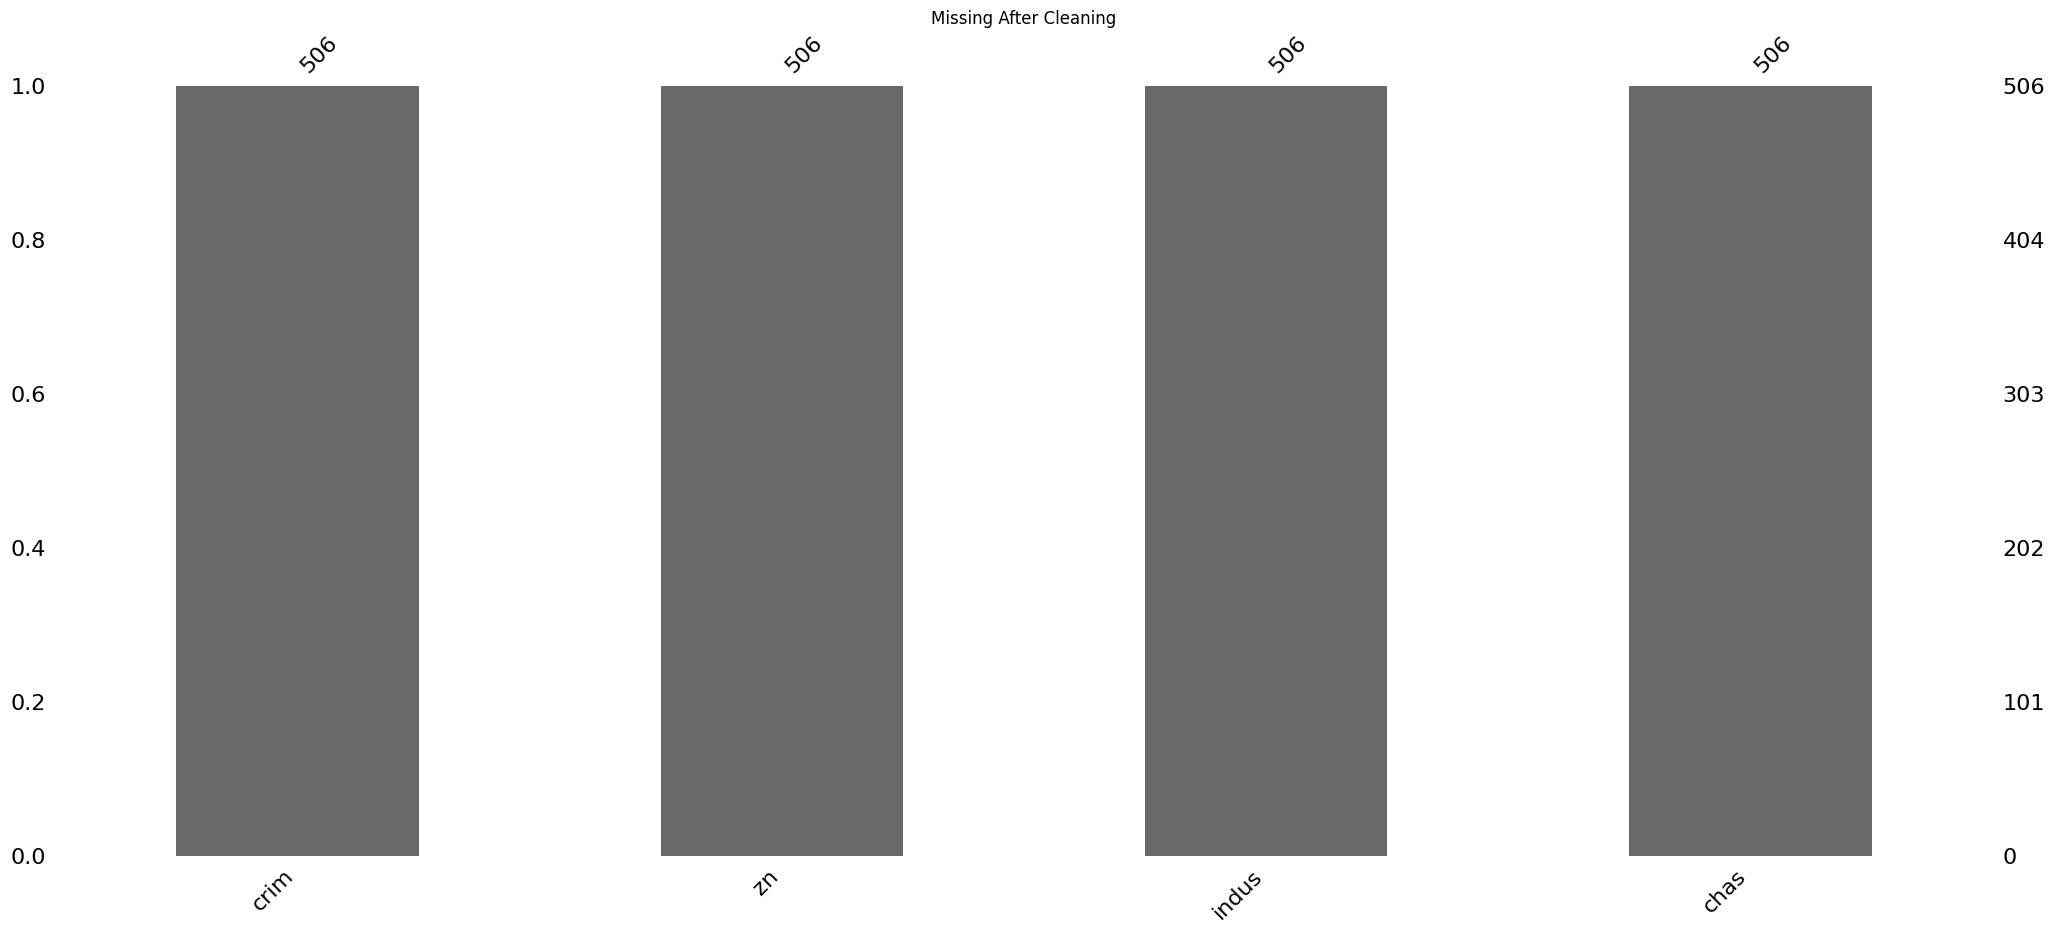

In [ ]:
### DATA CLEANING ###
print("\nMissing Data %:")
print(df_subset.isnull().mean() * 100)

# Visualize missing
msno.bar(df_subset)
plt.title("Missing Before Cleaning")
plt.show()

# Handle missing
for col in my_columns:
    if df_subset[col].dtype == 'object':
        df_subset[col].fillna(df_subset[col].mode()[0], inplace=True)
    else:
        df_subset[col].fillna(df_subset[col].median() if df_subset[col].skew() > 1 else df_subset[col].mean(), inplace=True)

# After Cleaning
msno.bar(df_subset)
plt.title("Missing After Cleaning")
plt.show()

## **3. Outlier Detection**

### 3.1 Visual Detection
- Boxplots for each numerical column.

### 3.2 Statistical Detection
- Z-score or IQR method to detect outliers.
- Cap/remove outliers.
- Re-plot boxplots.

---



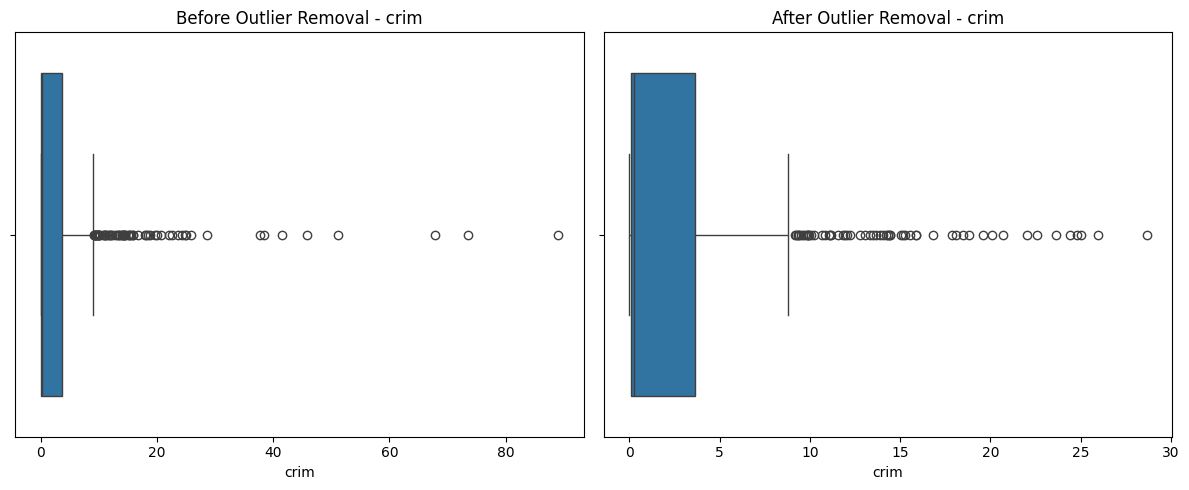

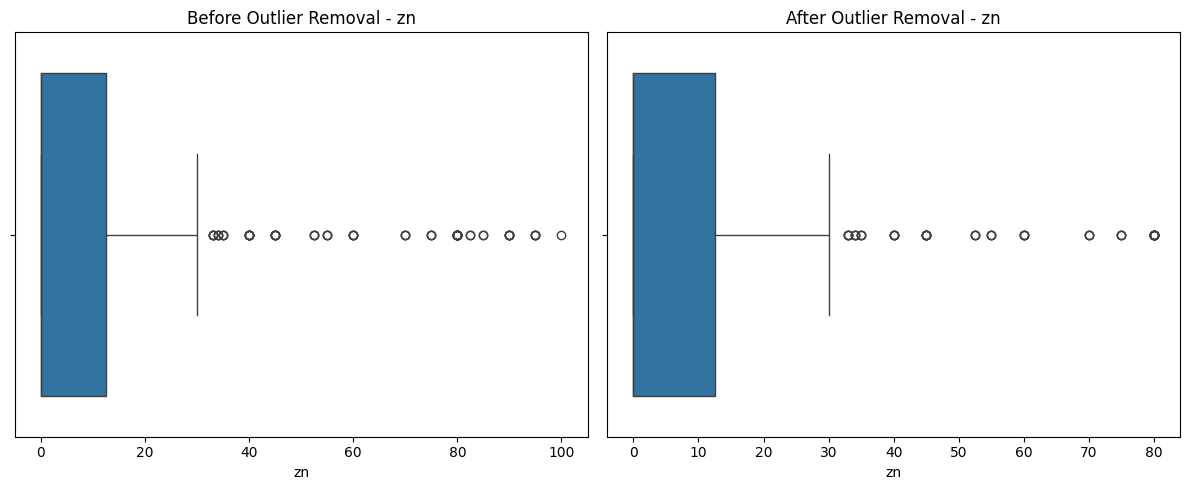

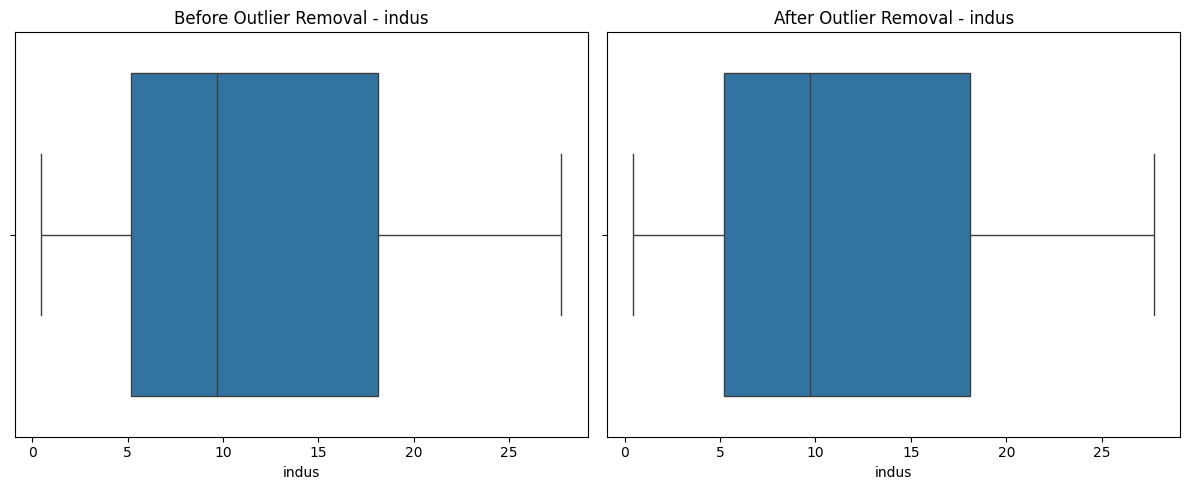

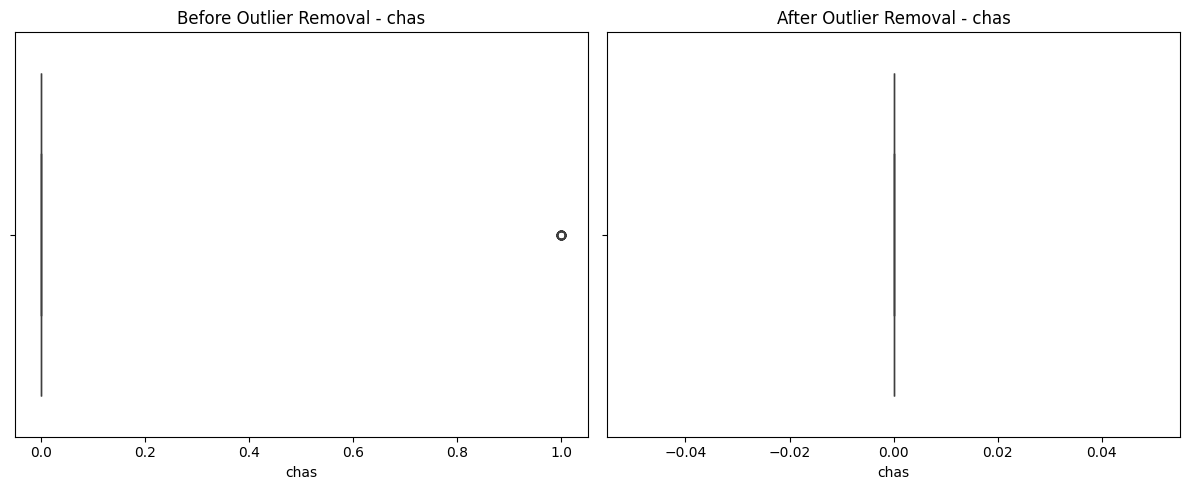

In [ ]:
# Detect outliers using Z-score
z = np.abs(stats.zscore(df_subset))
df_no_outliers = df_subset[(z < 3).all(axis=1)]

# Plot side-by-side boxplots
for col in my_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(x=df_subset[col], ax=axes[0])
    axes[0].set_title(f'Before Outlier Removal - {col}')

    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[1].set_title(f'After Outlier Removal - {col}')

    plt.tight_layout()
    plt.show()

## **4. Univariate Analysis**

### 4.1 For Each Column (All Members)
- Histogram + Boxplot.
- Normality Test (Shapiro/D’Agostino).
- Description of distribution (Normal/Skewed).

---



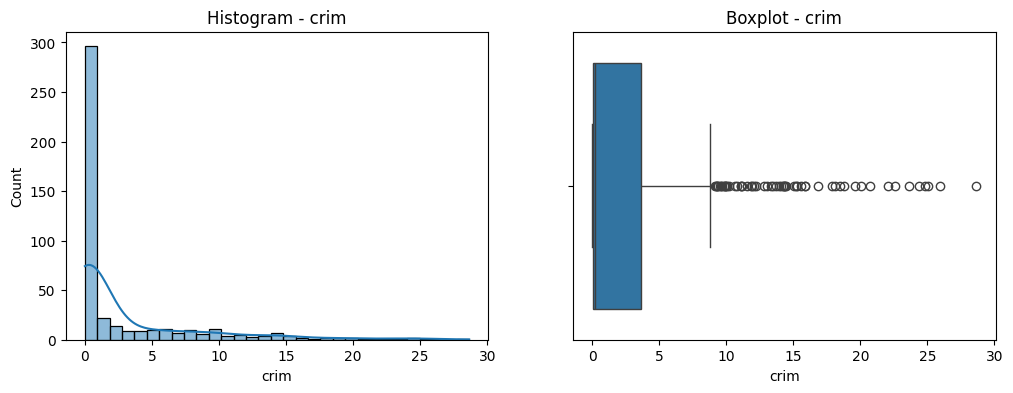

crim - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


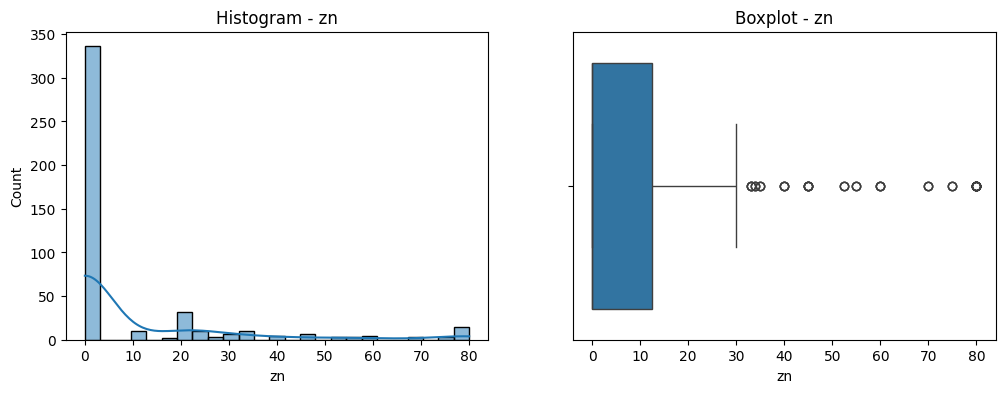

zn - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


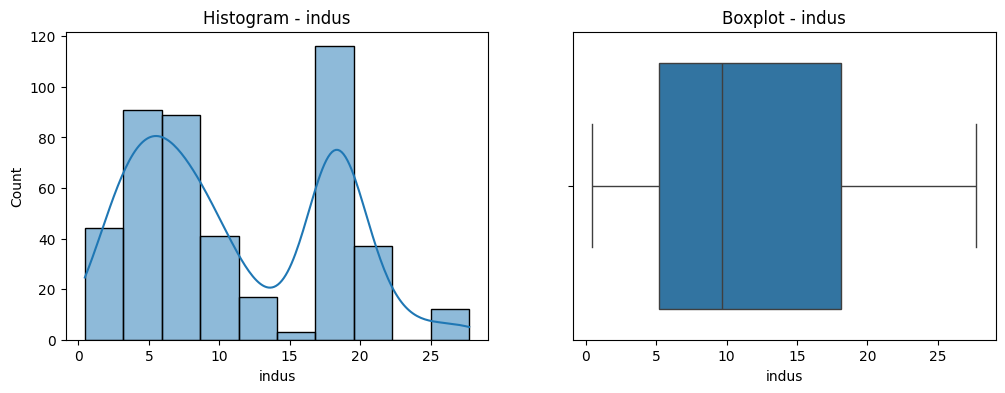

indus - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


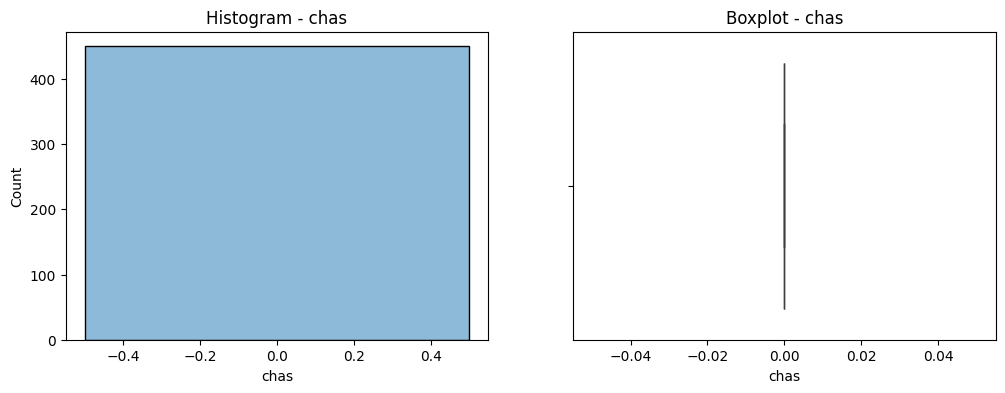

chas - Shapiro-Wilk Test p-value: 1.0000
Probably Normal


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
### 3. UNIVARIATE ANALYSIS ###
for col in my_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_no_outliers[col], kde=True, ax=axes[0])
    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[0].set_title(f'Histogram - {col}')
    axes[1].set_title(f'Boxplot - {col}')
    plt.show()

    stat, p = stats.shapiro(df_no_outliers[col])
    print(f"{col} - Shapiro-Wilk Test p-value: {p:.4f}")
    print("Probably Normal" if p > 0.05 else "Probably Not Normal")

## **5. Multivariate Analysis**

### 5.1 Pairwise Relationships
- Pairplot of selected variables vs MEDV.
- Scatterplots/Boxplots for key variables.

### 5.2 Correlation Matrix
- Heatmap showing correlation among numerical variables.
- Highlight important correlations with MEDV.

---


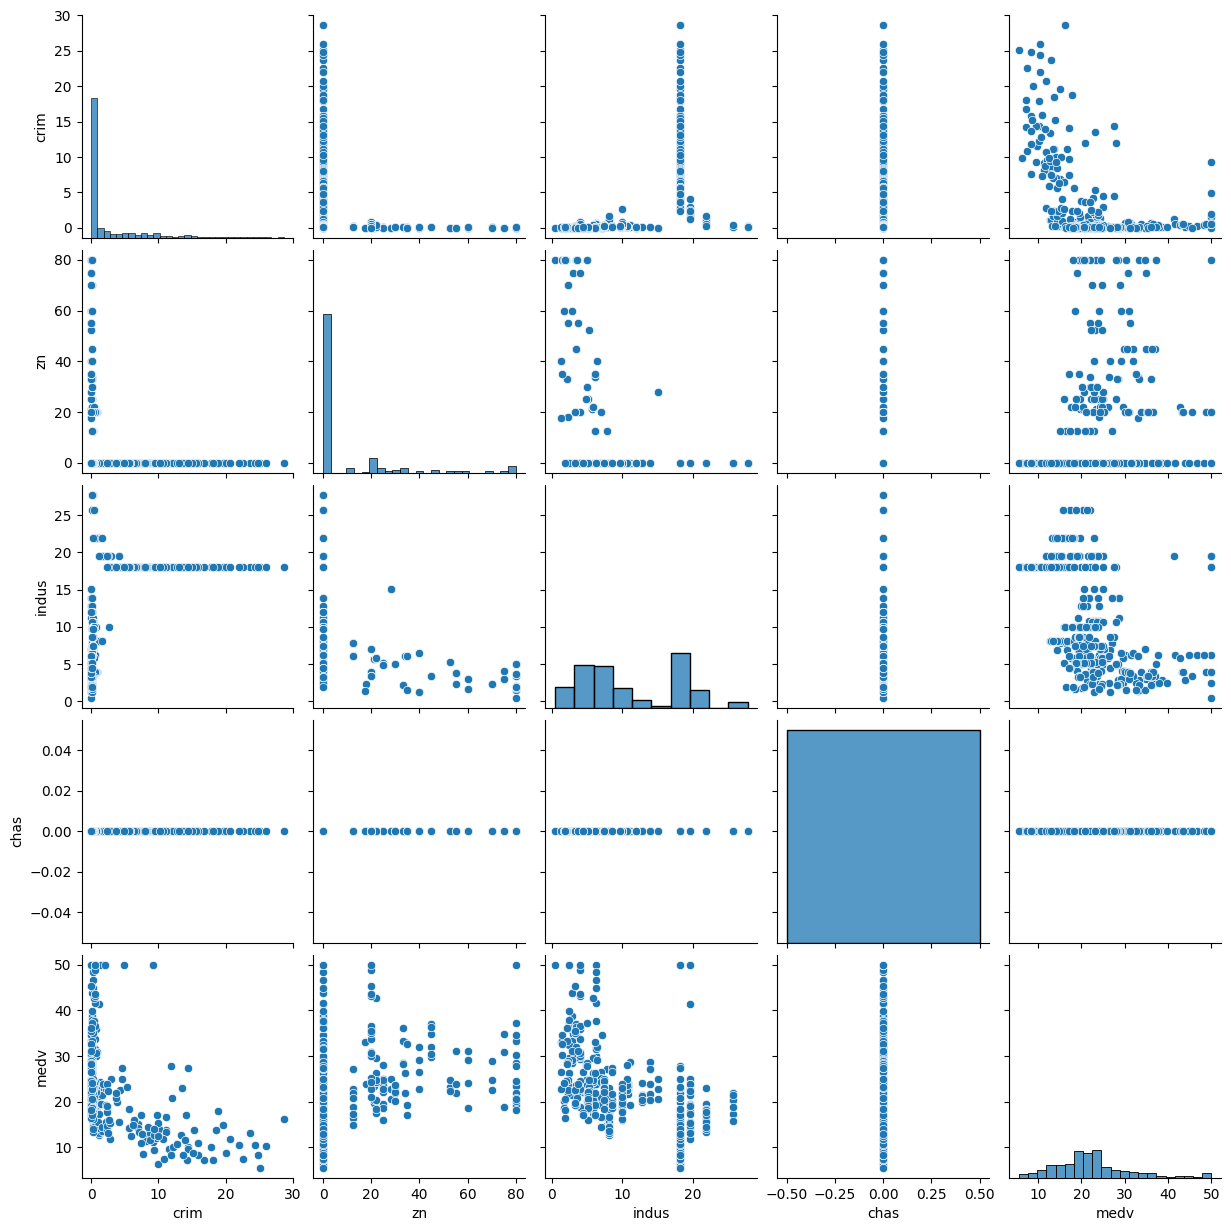

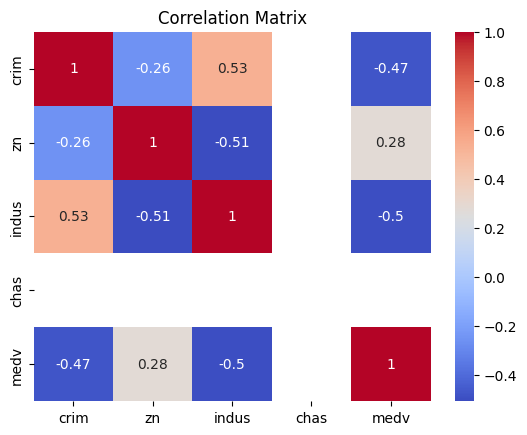

In [ ]:
### 4. MULTIVARIATE ANALYSIS ###
# Add target column for correlation
if target_column in df.columns:
    df_corr = df_no_outliers.copy()
    df_corr[target_column] = df[target_column][:len(df_corr)]

    sns.pairplot(df_corr[my_columns + [target_column]])
    plt.show()

    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# **6. Summary & Final Opinion**

- Summary of key findings by all members.
- Most relevant variables for predicting MEDV.
- Any assumptions or limitations.

---



  1. Among the assigned columns ('crim', 'zn', 'indus', 'chas'), indus had 0.395257% missing values. Since indus is skewed, we used median imputation. Others had no missing values. The missing value bar plot confirms that all missing values were successfully handled.

  2.**Outliers:**

  In the **crim** column (per capita crime rate), several extreme values beyond 30 were observed before cleaning. After outlier removal (Z-score > 3), a significant number of these extreme values were removed, and the data distribution became more concentrated within a reasonable range.

  The **zn** column (proportion of residential land zoned for large lots) had scattered high outliers exceeding 50, and some beyond 80. Post-cleaning, the main body of the data remained unchanged, indicating fewer extreme values were removed, but the visible outliers were successfully addressed.
  3. **Univariate:**
  Only the **chas** column was approximately normally distributed (Shapiro-Wilk Test p-value: 1.0000). Histograms and boxplots support this observation.
  4. **Multivariate:**
  
  The correlation matrix illustrates the relationships between several features and the target variable, MEDV (Median value of owner-occupied homes). Key insights are:

    **CRIM** shows a moderate negative correlation with MEDV (r = -0.47), indicating that higher crime rates are associated with lower house prices.

    **ZN** has a weak positive correlation with MEDV (r = 0.28), suggesting that areas with more residential zoning tend to have slightly higher house prices.

    **INDUS** has a moderate negative correlation with MEDV (r = -0.50), implying that more industrial areas are associated with lower house values.

    **CHAS** does not have a clear correlation shown, likely due to it being a categorical variable (0 or 1), which often isn't strongly correlated in linear terms.

  From the matrix, we can interpret that lower crime and industrial presence and higher residential zoning are associated with higher house values, aligning with typical real estate expectations.


## **7. Appendix**
- Any additional notes, rejected plots, or alternate tests.

---



## **8. Viva Preparation Points**
- Key steps performed.
- Insights on specific columns.
- Discussion on correlation & prediction.
